In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

import re

from scipy import stats as stats

from collections import OrderedDict

import glob                            # A module for finding files using * and ?

# Cleaning Data in Python @ DataCamp

https://campus.datacamp.com/courses/cleaning-data-in-python/

In [45]:
cols = ['Kod stacji', 'Nazwa stacji', 'year', 'month', 'day', 'Średnie dobowe zachmurzenie ogólne',\
'Status pomiaru NOS', 'Średnia dobowa prędkość wiatru', 'Status pomiaru FWS',\
'mean daily temp', 'Status pomiaru TEMP', 'Średnia dobowe ciśnienie pary wodnej',\
'Status pomiaru CPW', 'Średnia dobowa wilgotność względna', 'Status pomiaru WLGS',\
'Średnia dobowe ciśnienie na poziomie stacji', 'Status pomiaru PPPS', \
'Średnie dobowe ciśnienie na pozimie morza', 'Status pomiaru PPPM', 'Suma opadu dzień', \
'Status pomiaru WODZ', 'Suma opadu noc', 'Status pomiaru WONO']

In [46]:
climate1 = pd.read_csv(r'C:\Users\Ol\Documents\DATA ANALYSIS\CLIMATE\s_d_t_03_2018.csv',\
                       encoding='1250', header=None)

In [47]:
climate1.columns = cols

In [48]:
climate1 = climate1[climate1.iloc[:,1] == "WARSZAWA"]

In [ ]:
climate1.index = pd.to_datetime(climate1[['year', 'month', 'day']])

In [53]:
climate1.head()

,Kod stacji,Nazwa stacji,year,month,day,Średnie dobowe zachmurzenie ogólne,Status pomiaru NOS,Średnia dobowa prędkość wiatru,Status pomiaru FWS,mean daily temp,...,Średnia dobowa wilgotność względna,Status pomiaru WLGS,Średnia dobowe ciśnienie na poziomie stacji,Status pomiaru PPPS,Średnie dobowe ciśnienie na pozimie morza,Status pomiaru PPPM,Suma opadu dzień,Status pomiaru WODZ,Suma opadu noc,Status pomiaru WONO
2018-03-01,352200375,WARSZAWA,2018,3,1,4.5,NaN,2.4,NaN,-11.5,...,67.9,NaN,1008.6,NaN,1022.7,NaN,0.0,NaN,0.0,NaN
2018-03-02,352200375,WARSZAWA,2018,3,2,2.5,NaN,3.0,NaN,-11.6,...,69.6,NaN,997.5,NaN,1011.4,NaN,0.0,NaN,0.1,NaN
2018-03-03,352200375,WARSZAWA,2018,3,3,3.8,NaN,2.8,NaN,-9.6,...,71.5,NaN,992.9,NaN,1006.6,NaN,0.1,NaN,0.0,NaN
2018-03-04,352200375,WARSZAWA,2018,3,4,2.1,NaN,1.9,NaN,-7.2,...,71.6,NaN,996.0,NaN,1009.6,NaN,0.0,NaN,0.0,NaN
2018-03-05,352200375,WARSZAWA,2018,3,5,4.1,NaN,3.9,NaN,-2.3,...,59.3,NaN,993.1,NaN,1006.5,NaN,0.0,NaN,0.0,NaN


In [66]:
airwaw = pd.read_csv(r'C:\Users\Ol\Documents\DATA ANALYSIS\WARSAW_AIR\air_waw_01_2016_04_2018.csv',\
                    skiprows=1, sep=';')

In [78]:
airwaw.columns=['date', 'PM2.5']
airwaw.index = pd.to_datetime(airwaw['date'])

In [85]:
airwaw = airwaw.drop('date', axis=1)

In [88]:
airwaw = airwaw['2018-03'].resample(rule='D').mean()

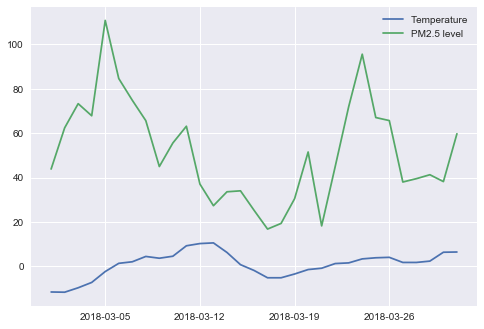

In [99]:
plt.plot(climate1['mean daily temp'], label='Temperature')
plt.plot(airwaw['PM2.5'], label='PM2.5 level')
plt.legend()
plt.show()

In [95]:
stats.pearsonr(climate1['mean daily temp'], airwaw['PM2.5'])

(-0.23786158763549914, 0.2056124582480331)

## Tidy Data: Melt with pandas

*"Tidy datasets are easy to manipulate, model and visualize, and have a specic structure:
each variable is a column, each observation is a row, and each type of observational unit
is a table."* (Wickham, 2010)

In [111]:
# Create a messy dataset (good for presentation, but not for analysis)
messy = pd.DataFrame({'name': ['Daniel', 'John', 'Jane'], 'treatment_A': [np.nan, 12, 24],\
                      'treatment_B': [42,31,27]})

In [236]:
messy

,name,treatment_A,treatment_B
0,Daniel,NaN,42
1,John,12.0,31
2,Jane,24.0,27


* Let's **pd.melt()** this dataframe! :)



* **Notice**: **id_vars** defines the columns that are not going to be melted!

In [114]:
pd.melt(messy, id_vars='name')

,name,variable,value
0,Daniel,treatment_A,NaN
1,John,treatment_A,12.0
2,Jane,treatment_A,24.0
3,Daniel,treatment_B,42.0
4,John,treatment_B,31.0
5,Jane,treatment_B,27.0


* To change new columns' names use **var_name** and **value_name**:

In [117]:
melted = pd.melt(messy, id_vars='name', var_name='treatment', value_name='result')
melted

,name,treatment,result
0,Daniel,treatment_A,NaN
1,John,treatment_A,12.0
2,Jane,treatment_A,24.0
3,Daniel,treatment_B,42.0
4,John,treatment_B,31.0
5,Jane,treatment_B,27.0


## Un-melting the dataset: .pivot() and .pivot_table()


* **.pivot()** and **.pivot_table()** are very similar.


* **.pivot_table()** has got an additional parameter **aggfunc**, where you can specify the method of aggregating the observations that have the same index.

        ...aggfunc=np.mean)

In [125]:
pivot = melted.pivot_table(index='name', columns='treatment', values='result')
pivot

treatment,treatment_A,treatment_B
name,,
Daniel,NaN,42.0
Jane,24.0,27.0
John,12.0,31.0


## Melting and retrieving information from columns

* In some cases you can have more than one variable stored in one column. Like in Hadley Wickham's dataset, where sex and age are coded together as 'sexage_range', eg. m014

In [128]:
# Recreate a part of Wickham's dataset:
wick = pd.DataFrame({'country': ['AD', 'AE', 'AF', 'AG'], 'year': [2000, 2000, 2000, 2000],\
                     'm014': [0.0, 2.0, 52.0, 0.0], 'm1525': [0.0, 4.0, 228.0, 0.0]})

In [129]:
wick

,country,m014,m1525,year
0,AD,0.0,0.0,2000
1,AE,2.0,4.0,2000
2,AF,52.0,228.0,2000
3,AG,0.0,0.0,2000


In [237]:
wick_melt = pd.melt(wick, id_vars=['country', 'year'])
wick_melt.sample(3)

,country,year,variable,value
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
5,AE,2000,m1525,4.0


In [134]:
# Create gender column
wick_melt['gender'] = wick_melt.variable.str[0]
wick_melt.head(2)

,country,year,variable,value,gender
0,AD,2000,m014,0.0,m
1,AE,2000,m014,2.0,m


In [136]:
# Create age range column
wick_melt['age_group'] = wick_melt.variable.str[1:]
wick_melt.head(2)

,country,year,variable,value,gender,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014


## Dealing with delimiter separated columns

In [184]:
# Simulate the dataset
ebola = pd.DataFrame(OrderedDict({'Date': ['1/5/2015', '1/4/2015'], 'Day': [289, 288],\
                      'Cases_Guinea': [2776, 2775], 'Cases_SierraLeone': [10030, 9780],\
                     'Deaths_Guinea': [1786, 1781], 'Deaths_SierraLeone': [2977, 2943]}))

In [185]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_SierraLeone,Deaths_Guinea,Deaths_SierraLeone
0,1/5/2015,289,2776,10030,1786,2977
1,1/4/2015,288,2775,9780,1781,2943


In [186]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], \
                     var_name='type_country', value_name='counts')

In [187]:
ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776
1,1/4/2015,288,Cases_Guinea,2775
2,1/5/2015,289,Cases_SierraLeone,10030
3,1/4/2015,288,Cases_SierraLeone,9780
4,1/5/2015,289,Deaths_Guinea,1786


In [188]:
# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt['type_country'].str.split('_')

In [189]:
ebola_melt.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775,"[Cases, Guinea]"
2,1/5/2015,289,Cases_SierraLeone,10030,"[Cases, SierraLeone]"
3,1/4/2015,288,Cases_SierraLeone,9780,"[Cases, SierraLeone]"
4,1/5/2015,289,Deaths_Guinea,1786,"[Deaths, Guinea]"


In [190]:
# Create the 'type' column
ebola_melt['type'] = ebola_melt['str_split'].str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt['str_split'].str.get(1)

In [191]:
# Drop unused columns
ebola_melt = ebola_melt.drop(['type_country', 'str_split'], axis=1)

In [192]:
ebola_melt.head()

,Date,Day,counts,type,country
0,1/5/2015,289,2776,Cases,Guinea
1,1/4/2015,288,2775,Cases,Guinea
2,1/5/2015,289,10030,Cases,SierraLeone
3,1/4/2015,288,9780,Cases,SierraLeone
4,1/5/2015,289,1786,Deaths,Guinea


## Concatenation

In [196]:
# Define dataframes
frm1 = pd.DataFrame({'a': [1,2,3,4], 'b': [5,6,7,8]})
frm2 = pd.DataFrame({'a': [9,12,34,14], 'b': [7,78,73,8]})
frm3 = pd.DataFrame({'c': [9,12,34,14], 'd': [7,78,73,8]})

* #### Row concatenation

In [198]:
pd.concat([frm1, frm2], ignore_index=True).sample(3)

,a,b
6,34,73
0,1,5
1,2,6


* #### Column concatenation

In [201]:
pd.concat([frm1, frm3], axis=1).sample(3)

,a,b,c,d
1,2,6,12,78
3,4,8,14,8
2,3,7,34,73


## Reading in multiple files using glob module

In [203]:
# Define a pattern
pattern = r'C:\Users\Ol\Documents\DATA ANALYSIS\CLIMATE\s_d_???????.csv'

In [204]:
# Create a list of the files
csv_list = glob.glob(pattern)

In [225]:
# Create a loop to read-in files as dataframes and store them in a list
dfs = []

for file in csv_list:
    dfs.append(pd.read_csv(file, encoding='1250', header=None))

In [226]:
# Check shapes
dfs[0].shape[0] + dfs[1].shape[0] + dfs[2].shape[0]

5130

In [227]:
# Concat the frames
cnctntd = pd.concat(dfs)

In [228]:
cnctntd.shape

(5130, 65)

In [230]:
cnctntd.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
92,349190650,KASPROWY WIERCH,2018,3,31,0.7,NaN,-2.0,NaN,-0.1,...,NaN,0,NaN,R,0,8.0,0,8.0,0,8.0
1380,353200272,OLSZTYN,2018,3,17,-2.7,NaN,-8.6,NaN,-5.9,...,NaN,0,NaN,Z,19,NaN,0,9.0,0,8.0
917,352160330,POZNAŃ,2018,2,22,0.3,NaN,-8.2,NaN,-3.8,...,NaN,0,NaN,Z,34,NaN,0,9.0,0,8.0


## Merging datasets

When we want to build a dataset that consists of two other datasets that have eg. one column in common, but ordered differently we should use **merge**. It's similar to **SQL JOIN**

In [232]:
# Simulate datasets
population = pd.DataFrame({'city': ['Ghor', 'Khor', 'Bhor'], 'population': [200, 300, 400]})
abbrev = pd.DataFrame({'name': ['Khor', 'Bhor', 'Ghor'], 'abbreviation': ['KH', 'BH', 'GH']})

In [238]:
population.head(2)

,city,population
0,Ghor,200
1,Khor,300


In [239]:
abbrev.head(2)

,abbreviation,name
0,KH,Khor
1,BH,Bhor


In [234]:
pd.merge(left=population, right=abbrev, on=None, left_on='city', right_on='name')

,city,population,abbreviation,name
0,Ghor,200,GH,Ghor
1,Khor,300,KH,Khor
2,Bhor,400,BH,Bhor


* ### Types of merges:


    * One-to-one
    * One-to-many / Many-to-one
    * Many-to-many
    
    
The above example is an example of **one-to-one** merge

## Working with data types in pandas

In [251]:
# Load tips dataset
tips = pd.read_csv(r'C:\Users\Ol\Documents\DATA ANALYSIS\tips.csv')

In [252]:
tips.sample(3)

,total_bill,tip,sex,smoker,day,time,size
190,15.69,1.5,Male,Yes,Sun,Dinner,2
167,31.71,4.5,Male,No,Sun,Dinner,4
26,13.37,2,Male,No,Sat,Dinner,2


In [253]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null object
tip           244 non-null object
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: int64(1), object(6)
memory usage: 7.7+ KB


* #### Change columns' 'sex' and 'smoker' dtype to 'category'

In [254]:
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

In [255]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null object
tip           244 non-null object
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), int64(1), object(4)
memory usage: 6.3+ KB


* **Notice** how this change reduced memory usage ($15$% decrease!)

* ### Change 'tip' and 'total_bill' columns' types to numeric. 

Change non-numeric values into NaNs using errors='coerce' 

In [256]:
# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

In [257]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    243 non-null float64
tip           243 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: category(2), float64(2), int64(1), object(2)
memory usage: 8.2+ KB


## Use case: clean txt grades

Convert a messy text document into analyzable data type

In [3]:
with open (r'C:\Users\Ol\Desktop\globalizacja-wyniki.txt') as f:
    text = f.readlines()

In [4]:
text = text[1:-1]

In [5]:
text[-1]

'104.360423                         5\n'

In [6]:
grades = []

for line in text:
    grade = line[-3:].strip('\n').strip(' ')
    try:
        if grade.endswith('+'):
            grades.append(float(grade[0] + '.5'))
        else:
            grades.append(float(grade))
    except ValueError:
        print('Value Error: "{}"'.format(grade))

In [7]:
grades = np.array(grades)

In [8]:
np.mean(grades), np.std(grades)

(3.6875, 0.9203560661295923)

In [9]:
sum(grades < 4)/len(grades)

0.5480769230769231

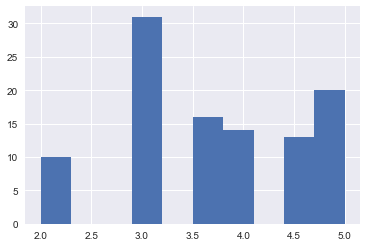

In [16]:
plt.hist(grades)
plt.show()

In [15]:
stats.shapiro(grades)

(0.8874048590660095, 2.4574026724621945e-07)

## Using RE

* #### Some pattern matching examples:

In [57]:
pttrn = re.compile('\d{3}-\d{3}-\d{3}')

* You use **\d{n}**, where **n** is a number of digits, to match $0$ to $inf$ digits.

In [61]:
bool(pttrn.match('501-792-102'))

True

* **+** means 'one or more'. **\w+** mean 'one or more alphanumeric characters

In [79]:
pttrn = re.compile('\w+@\w+\.\w+')

In [77]:
bool(pttrn.match('mothashipp@gmail.com'))

True

In [73]:
# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)

['10', '1']


* To match **capital characters** use **[A-Z]:**

In [89]:
bool(re.match(pattern='[A-Z]\w+',string='Asd'))

True

* To match **all unicode capital characters** you'll need to specify all capital ranges or use another library called **regex**:

        import regex
        p = regex.compile(r"\p{Lu}")
        if p.match("Żółw"):
                print("Capitalized!")

## Using functions to clean data

In [147]:
# Load tips dataset
tips = pd.read_csv(r'C:\Users\Ol\Documents\DATA ANALYSIS\tips.csv', na_values='-')

# Fill NAs:
tips.fillna(tips.mean(), inplace=True)

* ### Recode values using a function

In [148]:
# Define recode_sex()
def recode_sex(sex_value):

    # Return 1 if sex_value is 'Male'
    if sex_value == 'Male':
        return 1
    
    # Return 0 if sex_value is 'Female'    
    elif sex_value == 'Female':
        return 0
    
    # Return np.nan    
    else:
        return np.nan

In [149]:
# Apply the function to the sex column
tips['sex_recode'] = tips['sex'].apply(recode_sex)

# Print the first five rows of tips
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,sex_recode
49,18.04,3.00,Male,No,Sun,Dinner,2,1
188,18.15,3.50,Female,Yes,Sun,Dinner,3,0
167,31.71,4.50,Male,No,Sun,Dinner,4,1
196,10.34,2.00,Male,Yes,Thur,Lunch,2,1
85,34.83,5.17,Female,No,Thur,Lunch,4,0


* ### Lambdas

In [150]:
# Add a fake column
tips['total_dollar'] = tips['total_bill'].apply(lambda x: '$' + str(x))

In [151]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,sex_recode,total_dollar
0,16.99,1.010000,Female,No,Sun,Dinner,2,0,$16.99
1,10.34,3.003786,Male,No,Sun,Dinner,3,1,$10.34


In [152]:
# Write the lambda function using replace
tips['total_dollar_replace'] = tips['total_dollar'].apply(lambda x: x.replace('$', ''))

# Print the head of tips
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,sex_recode,total_dollar,total_dollar_replace
0,16.99,1.010000,Female,No,Sun,Dinner,2,0,$16.99,16.99
1,10.34,3.003786,Male,No,Sun,Dinner,3,1,$10.34,10.34


In [153]:
# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips['total_dollar'].apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,sex_recode,total_dollar,total_dollar_replace,total_dollar_re
0,16.99,1.010000,Female,No,Sun,Dinner,2,0,$16.99,16.99,16.99
1,10.34,3.003786,Male,No,Sun,Dinner,3,1,$10.34,10.34,10.34


* ### Duplicate data

In [154]:
bllbrd = pd.read_csv(r'C:\Users\Ol\Documents\DATA ANALYSIS\billboard2000_duplicates.csv'\
                     , na_values='NA')

In [161]:
bllbrd.head(2)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Check the shape of the dataframe
bllbrd.shape

(322, 81)

In [160]:
# and again after dropping the duplicates
bllbrd.drop_duplicates().shape

(317, 81)

* Aniother creative usage of **.drop_duplicates()** would be to filter the dataframe.

* ### Using assert



* **assert** returns nothing when assertion is true and returns **AssertionError** when assertion is false

In [168]:
assert 1 == 1

In [169]:
assert 1 == 2

AssertionError: 

In [174]:
bllbrd.notnull().all().all()             # It also works without assert :)

False

In [175]:
bllbrd.fillna(0).notnull().all().all()

True

## Putting it all together

In [181]:
# Read in Gapminder life expectancy data
gapm = pd.read_excel(r'C:\Users\Ol\Documents\DATA ANALYSIS\indicator life_expectancy_at_birth.xlsx', \
                    sheet_name=None)

In [182]:
gapm.keys()

odict_keys(['Data', 'About', 'Footnotes', 'Settings', 'Download', 'v'])

In [185]:
gapm = gapm['Data']

In [187]:
gapm.sample(5)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
124,Lebanon,29.7,29.7,29.7,29.7,29.7,29.7,29.7,29.7,29.7,...,77.5,77.8,77.9,78.1,76.6,78.5,78.6,78.7,78.9,79.1
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Bangladesh,25.5,25.5,25.5,25.5,25.5,25.5,25.5,25.5,25.5,...,67.7,68.3,68.6,68.8,69.3,69.4,69.8,70.1,70.4,70.7
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Christmas Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


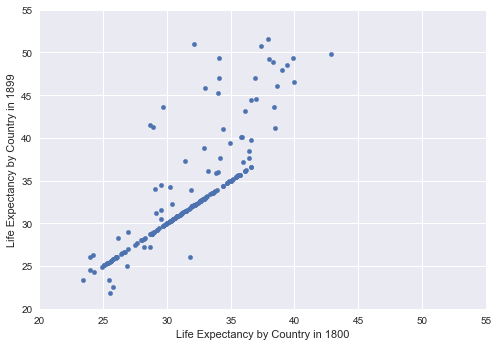

In [193]:
# Plot the data
# Create the scatter plot
gapm.plot(kind='scatter', x=1800, y=1899)

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

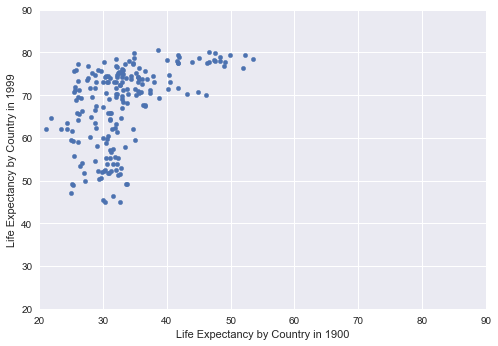

In [198]:
# Plot the data
# Create the scatter plot
gapm.plot(kind='scatter', x=1900, y=1999)

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1900')
plt.ylabel('Life Expectancy by Country in 1999')

# Specify axis limits
plt.xlim(20, 90)
plt.ylim(20, 90)

# Display the plot
plt.show()

* ### Testing 

Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

    * 'Life expectancy' is the first column (index 0) of the DataFrame.
    * The other columns contain either null or numeric values.
    * The numeric values are all greater than or equal to 0.
    * There is only one instance of each country.

You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

In [203]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert gapm.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert gapm.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert gapm['Life expectancy'].value_counts()[0] == 1


* ### Reshaping your data

Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by melting it.

In [218]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapm, id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
gapminder_melt.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


* ### Check the data types

In [220]:
gapminder_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 3 columns):
country            56420 non-null object
year               56420 non-null object
life_expectancy    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 881.6+ KB


In [221]:
# Convert the year column to numeric
gapminder_melt.year = pd.to_numeric(gapminder_melt.year)

# Test if country is of type object
assert gapminder_melt.country.dtypes == np.object

# Test if year is of type int64
assert gapminder_melt.year.dtype == np.int64

# Test if life_expectancy is of type float64
assert gapminder_melt.life_expectancy.dtype == np.float64

* ### Looking at country spellings

Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the 'country' column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

    The set of lower and upper case letters.
    Whitespace between words.
    Periods for any abbreviations.

To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Python has a built-in string method - str.contains() - which takes a regular expression pattern, and applies it to the Series, returning True if there is a match, and False otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using ~. This Boolean series can then be used to get the Series of countries that have invalid names.

In [228]:
# Create the series of countries: countries
countries = gapminder_melt.country

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
invalid_countries.sample(5)

93        Guinea-Bissau
131        Macao, China
132      Macedonia, FYR
225         Timor-Leste
51478             Åland
Name: country, dtype: object

* ### Checking for and dropping missing data

In [224]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder_melt.year).all()

In [225]:
gapminder_melt.shape

(56420, 3)

In [226]:
# Drop the missing values
gapminder_melt = gapminder_melt.dropna(axis=0)

# Print the shape of gapminder
gapminder_melt.shape

(43857, 3)

* ### Wrapping Up

In [230]:
# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head(2))

# Print the tail of gapminder_agg
print(gapminder_agg.tail(2))

year
1800    31.486020
1801    31.448905
Name: life_expectancy, dtype: float64
year
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


* #### Visualize

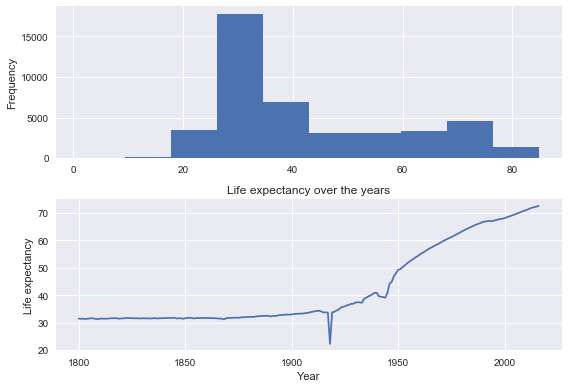

In [231]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder_melt['life_expectancy'].plot(kind='hist')

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

In [233]:
# Save both DataFrames to csv files
gapminder_melt.to_csv(r'C:\Users\Ol\Documents\DATA ANALYSIS\gapminder_edit.csv')
gapminder_agg.to_csv(r'C:\Users\Ol\Documents\DATA ANALYSIS\gapminder__edit_agg.csv')

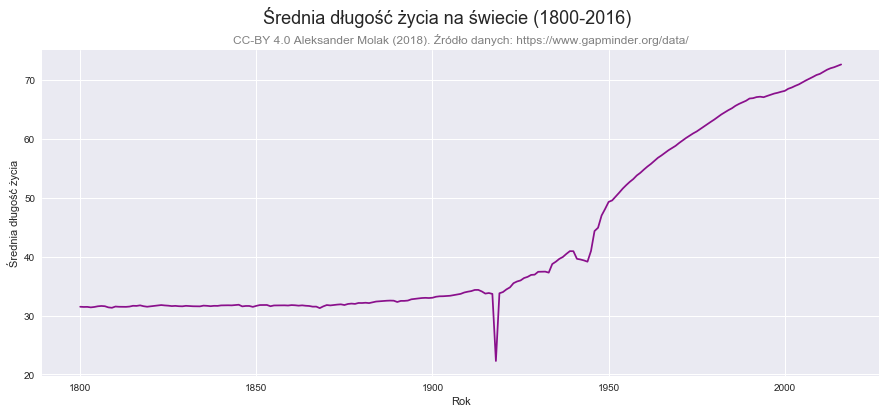

In [258]:
# Additional plot
plt.figure(figsize=(15,6))
plt.plot(gapminder_agg, color='#8a108c')
plt.suptitle('Średnia długość życia na świecie (1800-2016)', fontsize=18)
plt.title('CC-BY 4.0 Aleksander Molak (2018). Źródło danych: https://www.gapminder.org/data/',\
          color='gray')
plt.ylabel('Średnia długość życia')
plt.xlabel('Rok')

plt.show()